In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
from src import datacleaning as dc
from src import linregvis as lrv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyRegressor
from statsmodels.graphics.regressionplots import abline_plot
from sklearn.metrics import mean_squared_error
%matplotlib inline
sns.set_style('darkgrid')
pd.options.display.float_format = "{:,.2f}".format
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick

In [2]:
# Getting the initial data and splitting into test and training sets in an 80:20 split
df = dc.test_split(
    dc.get_data('../../data/kc_house_data.csv')
)
X_train = df[0]
X_test = df[1]
y_train = df[2]
y_test = df[3]

In [3]:
# Data cleaning, dropping unused columns, feature engineering, dummy columns
X_train = dc.clean_it(df[0])
X_test = dc.clean_it(df[1])

In [4]:
X_train.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'grade', 'sqft_above', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'has_been_renovated', 'ratio_15',
       'years_old', 'condition_2', 'condition_3', 'condition_4',
       'condition_5'],
      dtype='object')

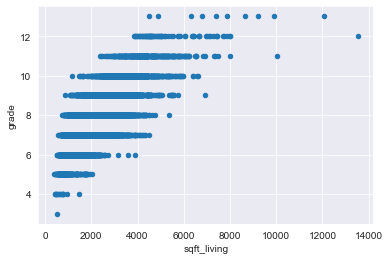

In [5]:
X_train.plot.scatter('sqft_living', 'grade')

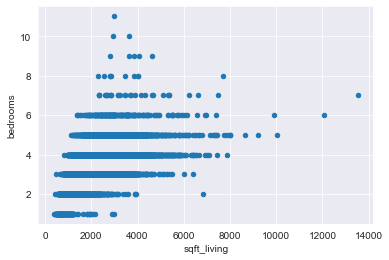

In [6]:
X_train.plot.scatter('sqft_living', 'bedrooms')

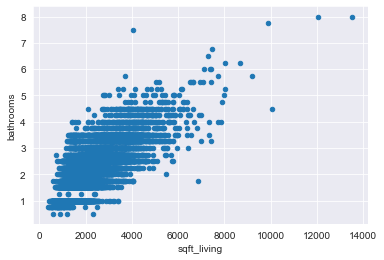

In [7]:
X_train.plot.scatter('sqft_living', 'bathrooms')

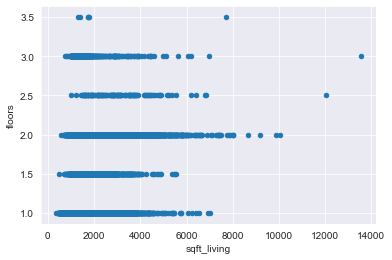

In [8]:
X_train.plot.scatter('sqft_living', 'floors')

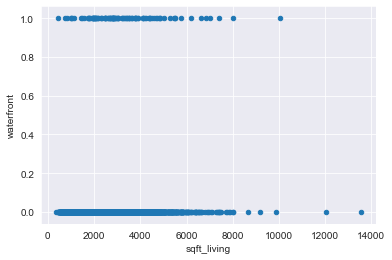

In [9]:
X_train.plot.scatter('sqft_living', 'waterfront')

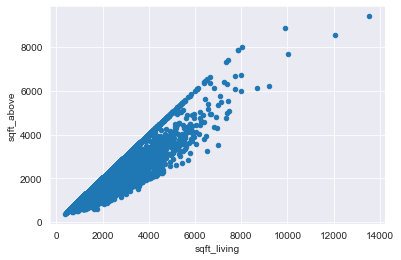

In [10]:
X_train.plot.scatter('sqft_living', 'sqft_above')

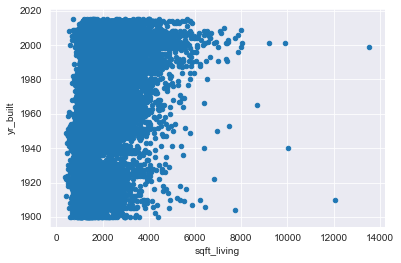

In [11]:
X_train.plot.scatter('sqft_living', 'yr_built')

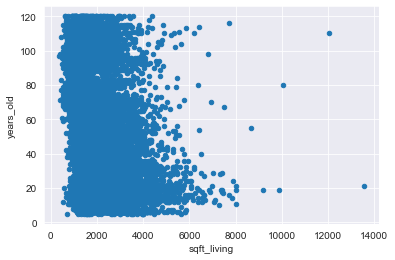

In [12]:
X_train.plot.scatter('sqft_living', 'years_old')

In [13]:
X_train.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,has_been_renovated,ratio_15,years_old,condition_2,condition_3,condition_4,condition_5
id,1.00,0.00,0.01,-0.01,-0.14,0.02,-0.00,0.01,-0.01,0.02,-0.01,-0.14,-0.01,-0.01,-0.02,-0.01,0.03,-0.02,-0.01
bedrooms,0.00,1.00,0.53,0.59,0.04,0.19,-0.00,0.37,0.49,0.16,0.41,0.03,0.02,0.43,-0.16,-0.05,0.01,-0.01,0.02
bathrooms,0.01,0.53,1.00,0.75,0.09,0.51,0.07,0.67,0.69,0.50,0.57,0.09,0.05,0.45,-0.50,-0.08,0.19,-0.16,-0.04
sqft_living,-0.01,0.59,0.75,1.00,0.18,0.36,0.10,0.76,0.88,0.32,0.76,0.18,0.05,0.56,-0.32,-0.07,0.10,-0.08,-0.02
sqft_lot,-0.14,0.04,0.09,0.18,1.00,-0.00,0.02,0.12,0.19,0.05,0.15,0.73,0.01,0.09,-0.05,0.04,-0.01,0.02,-0.02
floors,0.02,0.19,0.51,0.36,-0.00,1.00,0.03,0.46,0.53,0.49,0.29,-0.01,0.01,0.20,-0.49,-0.05,0.32,-0.26,-0.12
waterfront,-0.00,-0.00,0.07,0.10,0.02,0.03,1.00,0.09,0.07,-0.02,0.09,0.03,0.08,0.03,0.02,-0.01,-0.02,0.01,0.01
grade,0.01,0.37,0.67,0.76,0.12,0.46,0.09,1.00,0.76,0.45,0.72,0.12,0.02,0.28,-0.45,-0.09,0.20,-0.14,-0.09
sqft_above,-0.01,0.49,0.69,0.88,0.19,0.53,0.07,0.76,1.00,0.42,0.73,0.19,0.02,0.42,-0.42,-0.06,0.19,-0.14,-0.09
yr_built,0.02,0.16,0.50,0.32,0.05,0.49,-0.02,0.45,0.42,1.00,0.33,0.07,-0.21,0.09,-1.00,-0.07,0.39,-0.26,-0.25


In [14]:
abs(X_train.corr()) > 0.75

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,has_been_renovated,ratio_15,years_old,condition_2,condition_3,condition_4,condition_5
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False


In [15]:
df=X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [16]:
df[(df.cc>.70) & (df.cc <1)]

,cc
pairs,
"(yr_built, years_old)",1.00
"(sqft_above, sqft_living)",0.88
"(condition_3, condition_4)",0.81
"(grade, sqft_living)",0.76
"(sqft_living15, sqft_living)",0.76
"(grade, sqft_above)",0.76
"(sqft_living, bathrooms)",0.75
"(sqft_living15, sqft_above)",0.73
"(sqft_lot, sqft_lot15)",0.73


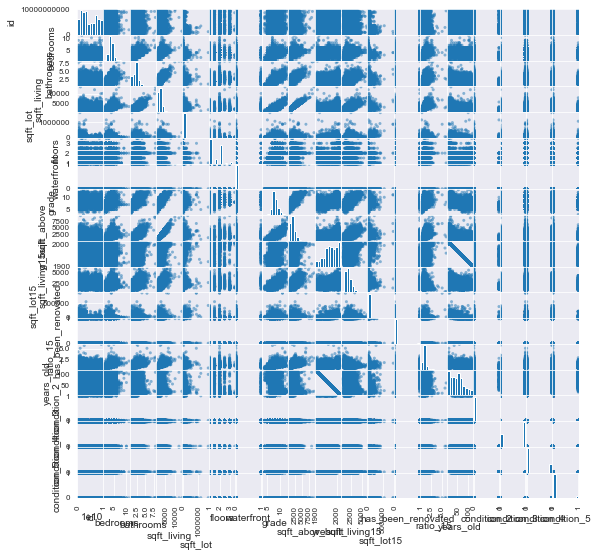

In [17]:
pd.plotting.scatter_matrix(X_train,figsize  = [9, 9]);
plt.show()

In [ ]:
formula = "price ~ bathrooms + grade + waterfront + years_old + sqft_living"
model_6 = lrv.run_lr(formula, X_train, y_train)

In [ ]:
y_pred = model_6.predict(X_train)
model_6_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
model_6_rmse

In [ ]:
formula = "price ~ waterfront + years_old + sqft_living"
model_6 = lrv.run_lr(formula, X_train, y_train)

In [ ]:
y_pred = model_6.predict(X_train)
model_6_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
model_6_rmse

In [ ]:
formula = "price ~ bathrooms + grade + waterfront + years_old + ratio_15"
model_6 = lrv.run_lr(formula, X_train, y_train)

In [ ]:
y_pred = model_6.predict(X_train)
model_6_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
model_6_rmse

In [ ]:
formula = "price ~ bathrooms + grade + waterfront + years_old + bedrooms"
model_6 = lrv.run_lr(formula, X_train, y_train)

In [ ]:
y_pred = model_6.predict(X_train)
model_6_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
model_6_rmse

In [ ]:
formula = "price ~ bedrooms + waterfront + years_old + sqft_living"
model_6 = lrv.run_lr(formula, X_train, y_train)

In [ ]:
y_pred = model_6.predict(X_train)
model_6_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
model_6_rmse

In [ ]:
formula = "price ~ bedrooms + has_been_renovated + waterfront + years_old + sqft_living"
model_6 = lrv.run_lr(formula, X_train, y_train)

In [ ]:
y_pred = model_6.predict(X_train)
model_6_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
model_6_rmse

In [ ]:
formula = "price ~ bedrooms + has_been_renovated + ratio_15 + waterfront + years_old + sqft_living"
model_6 = lrv.run_lr(formula, X_train, y_train)

In [ ]:
y_pred = model_6.predict(X_train)
model_6_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
model_6_rmse

In [ ]:
final_model = model_6

In [ ]:
mmean = final_model.resid.mean()
mmin = final_model.resid.min()
mmax = final_model.resid.max()
normalized_residuals = (final_model.resid - mmean)/(mmax - mmin)

t = final_model.fittedvalues
tmean = final_model.resid.mean()
tmin = final_model.resid.min()
tmax = final_model.resid.max()
normalized_predicted = (t - tmean)/(tmax - tmin)

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))
ax.set_xlabel('Normalized Residuals', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_title('Frequency of Normalized Residuals', fontsize = 24)
ax.set(xlim=(-0.25,.25))
sns.distplot(normalized_residuals, bins = 100);
fig.savefig('./images/residuals_hist.png', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))
ax.set_xlabel('Normalized Predicted Price', fontsize = 14)
ax.set_ylabel('Normalized Residuals', fontsize = 14)
ax.set_title('Residuals vs Predicted Values for Homoskedasticity', fontsize = 24)
sns.scatterplot(x = normalized_predicted, y = normalized_residuals);
fig.savefig('./images/homoskedasticity.png', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
stats.probplot(normalized_residuals, plot=plt)
ax.set_title('QQ Plot Probability of residuals', fontsize = 24)
ax.set_xlabel('Residuals', fontsize = 14)
ax.set_ylabel('Probability', fontsize = 14)
ax.legend(['Residuals','Normal line']);
fig.savefig('./images/qqplot.png', bbox_inches='tight')

In [ ]:
X_train2 = X_train
X_train2['low_grade'] = [1 if x < 7 else 0 for x in X_train2['grade']]
X_train2['mid_grade'] = [1 if ((x >= 7) & (x < 10)) else 0 for x in X_train2['grade']]
X_train2['high_grade'] = [1 if x > 10 else 0 for x in X_train2['grade']]


In [ ]:
formula = "price ~ bathrooms + low_grade + mid_grade + high_grade + waterfront + years_old"
model_6 = lrv.run_lr(formula, X_train2, y_train)

In [ ]:
final_model = model_6

In [ ]:
mmean = final_model.resid.mean()
mmin = final_model.resid.min()
mmax = final_model.resid.max()
normalized_residuals = (final_model.resid - mmean)/(mmax - mmin)

t = final_model.fittedvalues
tmean = final_model.resid.mean()
tmin = final_model.resid.min()
tmax = final_model.resid.max()
normalized_predicted = (t - tmean)/(tmax - tmin)

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))
ax.set_xlabel('Normalized Residuals', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_title('Frequency of Normalized Residuals', fontsize = 24)
ax.set(xlim=(-0.25,.25))
sns.distplot(normalized_residuals, bins = 100);
#fig.savefig('./images/residuals_hist.png', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))
ax.set_xlabel('Normalized Predicted Price', fontsize = 14)
ax.set_ylabel('Normalized Residuals', fontsize = 14)
ax.set_title('Residuals vs Predicted Values for Homoskedasticity', fontsize = 24)
sns.scatterplot(x = normalized_predicted, y = normalized_residuals);
fig.savefig('./images/homoskedasticity.png', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
stats.probplot(normalized_residuals, plot=plt)
ax.set_title('QQ Plot Probability of residuals', fontsize = 24)
ax.set_xlabel('Residuals', fontsize = 14)
ax.set_ylabel('Probability', fontsize = 14)
ax.legend(['Residuals','Normal line']);
fig.savefig('./images/qqplot.png', bbox_inches='tight')